# Educational Attainment of Foster Youth: Outcomes for Children in State Care
-----------------------------------------------------------

## Introduction
--------------------

According to the National Data Archive on Child Abuse and Neglect (NDACAN),  each year, about 10% of children who exit foster care are discharged each year due to having reached the states age limit for eligibility. These children are at increased risk of unemployment, criminal conviction, substance abuse, lower educational attainment, homelessness, and poor mental health in adulthood (Child Abuse and Neglect, 2011).  A positive education experience has the potential to be a powerful counterweight to the abuse, neglect, separation, impermanence and other barriers these vulnerable children experience. 

Participation in and persistence to a post-secondary credential can enhance the foster youths well-being, help them make more successful transitions to adulthood, and increase their chances for personal fulfillment and economic self-sufficiency. National research shows that children in foster care are at high risk of dropping out of school and are unlikely to attend or graduate from college. My analysis is intended to help look into the NYTD services provided by the Chafee Act and educational outcomes to determine if they are good predictors of success for the foster youth. 

The John H. Chafee Foster Care Independence Act of 1999 provided states with flexible funding intended to serve youth at risk of exiting foster care without permanency, and required that states track the services received by youth as well as youth outcomes. The data system developed to meet this requirement is referred to as National Youth in Transition Database (NYTD). 

## Client
-----------
Analyzing the educational outcomes and the services utilized by the foster youth can play an invaluable role in helping to highlight and better assess child welfare services and programs.

## Dataset
-------------
 - National Youth in Transition Database (NYTD) Outcomes File, FY 2011- 2016
NYTD outcomes database collects information about current and former foster youth as the youth transition from foster care to independence. Foster youth who turned 17 years old in Federal Fiscal Year (FFY) 2011 participated in the first-ever NYTD survey, and were followed up when they reached 19  years of age (in FFY 2013).

- National Youth in Transition Database (NYTD) Service File, FY 2011- 2016
NYTD services database collects information on all youth who receive at least one independent living skills service paid for or provided by a Chafee funded county or agency, regardless of their foster care status and regardless of their age. This is the Services population.


- Adoption and Foster Care Analysis and Reporting System (AFCARS) Annual File, FY 2000 - Present
AFCARS collects case-level information on all children in foster care for whom State child welfare agencies have responsibility of placement, care, or supervision and on children who are adopted under the auspices of the State's public child welfare agency.

## Acknowlegements
---------------------------
Thank you to my mentor, Abhishek Sharma, for all your support and assistance on this project.


The data used for my project were made available by the National Data Archive on Child Abuse and Neglect (NDACAN), Cornell University, Ithaca, NY, and have been used with permission. Data from the NYTD and AFCARS were originally collected by the states and provided to the Children’s Bureau. Funding for the project was provided by the Children’s Bureau, Administration on Children, Youth and Families, Administration for Children and Families, U.S. Department of Health and Human Services. The collector of the original data, the funder, the Archive, Cornell University and their agents or employees bear no responsibility for the analyses or interpretations presented here.


## Data Collection and Wrangling
-----------------------------------------
Before performing exploratory analysis, we must clean the data first. Analysis performed with Python.

1) Import STATA files as a Pandas DataFrame

In [136]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
# import NYTD Services file as a Pandas DataFrame
nytd_services = pd.io.stata.read_stata('NYTD Services 2011-2016.dta')

nytd_services.head()

,fy,stfips,st,repdate,recnumbr,dob,sex,amiakn,asian,blkafram,...,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,stfcid,race,raceethn,agemp
0,2013,1,AL,201309,000000009831,1998-07-15,Female,No,No,No,...,Yes,No,No,No,No,No,AL000000009831,White Only,"NH, White Only",14
1,2014,1,AL,201409,000000009831,1998-07-15,Female,No,No,No,...,Yes,No,No,No,No,No,AL000000009831,White Only,"NH, White Only",15
2,2015,1,AL,201509,000000009831,1998-07-15,Female,No,No,No,...,Yes,No,No,No,No,No,AL000000009831,White Only,"NH, White Only",16
3,2011,1,AL,201109,000000014871,1996-08-15,Female,No,No,Yes,...,No,No,No,No,No,No,AL000000014871,Black Only,"NH, Black Only",14
4,2012,1,AL,201209,000000014871,1996-08-15,Female,No,No,Yes,...,No,No,No,No,No,No,AL000000014871,Black Only,"NH, Black Only",15


In [138]:
# import NYTD Outcomes file as a Pandas DataFrame
nytd_outcomes = pd.io.stata.read_stata('Cohort14W2.dta')

nytd_outcomes.head()

,wave,stfcid,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,...,othrhlthin,medicalin,mentlhlthin,prescripin,baseline,fy14cohort,elig19,samplestate,insample,responded
0,Age 17 Baseline Survey,AL000000007183,1,AL,000000007183,201403,1996-10-15,female,no,no,...,no,yes,yes,yes,yes,no,no,no,no,yes
1,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,no,yes,yes,yes,yes,no,no,no,no,yes
2,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
3,Age 17 Baseline Survey,AL000000059581,1,AL,000000059581,201403,1996-11-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no
4,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no


2) Check for missing values:

In [139]:
nytd_services.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022724 entries, 0 to 1022723
Data columns (total 39 columns):
fy            1022724 non-null int16
stfips        1022724 non-null int8
st            1022724 non-null object
repdate       1022724 non-null object
recnumbr      1022724 non-null object
dob           1022724 non-null object
sex           1022724 non-null category
amiakn        1022724 non-null category
asian         1022724 non-null category
blkafram      1022724 non-null category
hawaiipi      1022724 non-null category
white         1022724 non-null category
raceunkn      1022724 non-null category
racedcln      1022724 non-null category
hisorgin      1022724 non-null category
fcstatsv      1022724 non-null category
lclfipssv     1022724 non-null category
tribesv       1022724 non-null category
delinqntsv    1022724 non-null category
edlevlsv      1022724 non-null category
specedsv      1022724 non-null category
ilnasv        1022724 non-null category
acsuppsv      1022724 

In [140]:
nytd_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40262 entries, 0 to 40261
Data columns (total 47 columns):
wave           40262 non-null category
stfcid         40262 non-null object
stfips         40262 non-null int8
st             40262 non-null object
recnumbr       40262 non-null object
repdate        40262 non-null object
dob            40262 non-null object
sex            40262 non-null category
amiakn         40262 non-null category
asian          40262 non-null category
blkafram       40262 non-null category
hawaiipi       40262 non-null category
white          40262 non-null category
raceunkn       40262 non-null category
racedcln       40262 non-null category
hisorgin       40262 non-null category
outcmrpt       40262 non-null category
outcmdte       40262 non-null object
outcmfcs       40262 non-null category
currfte        40262 non-null category
currpte        40262 non-null category
emplysklls     40262 non-null category
socsecrty      40262 non-null category
educaid   

No missing entries from both NYTD Datasets.

In [141]:
# Number of unique child ID that received services (RecNumbr = AFCARS Unique Child ID)
nytd_services['recnumbr'].nunique()

324463

In [142]:
# Foster Care Status - Services
fc = nytd_services.loc[nytd_services['fcstatsv'] == 'Yes, received services & was in FC']
fc['recnumbr'].nunique()

261588

- Number of youth in foster care receiving services (2011-2016): 261,588
- Number of youth no longer in foster care and still receiving services (2011-2016): 62,875

In [143]:
# Number of unique child IDs that participated in the baseline survey at age 17 (RecNumbr = AFCARS Unique Child ID)
nytd_outcomes['recnumbr'].nunique()

23781

In [144]:
# Create filtered DataFrame for wave 1 - Age 17 Baseline Survey
wave_1 = nytd_outcomes.loc[nytd_outcomes['wave'] == 'Age 17 Baseline Survey']
wave_1

,wave,stfcid,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,...,othrhlthin,medicalin,mentlhlthin,prescripin,baseline,fy14cohort,elig19,samplestate,insample,responded
0,Age 17 Baseline Survey,AL000000007183,1,AL,000000007183,201403,1996-10-15,female,no,no,...,no,yes,yes,yes,yes,no,no,no,no,yes
1,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,no,yes,yes,yes,yes,no,no,no,no,yes
2,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
3,Age 17 Baseline Survey,AL000000059581,1,AL,000000059581,201403,1996-11-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no
4,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no
5,Age 17 Baseline Survey,AL000000136739,1,AL,000000136739,201403,1997-02-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no
6,Age 17 Baseline Survey,AL000000193079,1,AL,000000193079,201403,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
7,Age 17 Baseline Survey,AL000000195457,1,AL,000000195457,201403,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
8,Age 17 Baseline Survey,AL000000198581,1,AL,000000198581,201409,1997-04-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
9,Age 17 Baseline Survey,AL000000198583,1,AL,000000198583,201403,1996-12-15,male,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no


In [145]:
# Create filtered DataFrame for wave 2 - Age 19 Followup
wave_2 = nytd_outcomes.loc[nytd_outcomes['wave'] == 'Age 19 Followup']
wave_2

,wave,stfcid,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,...,othrhlthin,medicalin,mentlhlthin,prescripin,baseline,fy14cohort,elig19,samplestate,insample,responded
23781,Age 19 Followup,AL000000046332,1,AL,000000046332,201603,1996-10-15,male,no,no,...,do not know,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23782,Age 19 Followup,AL000000193079,1,AL,000000193079,201603,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23783,Age 19 Followup,AL000000195457,1,AL,000000195457,201603,1996-10-15,male,no,no,...,yes,yes,yes,yes,yes,yes,yes,no,no,yes
23784,Age 19 Followup,AL000000198581,1,AL,000000198581,201609,1997-04-15,female,no,no,...,yes,do not know,not applicable,not applicable,yes,yes,yes,no,no,yes
23785,Age 19 Followup,AL000000199584,1,AL,000000199584,201609,1997-04-15,male,no,no,...,yes,yes,yes,yes,yes,yes,yes,no,no,yes
23786,Age 19 Followup,AL000000203185,1,AL,000000203185,201603,1997-03-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23787,Age 19 Followup,AL000000203921,1,AL,000000203921,201609,1997-05-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23788,Age 19 Followup,AL000000206382,1,AL,000000206382,201609,1997-07-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23789,Age 19 Followup,AL000000206479,1,AL,000000206479,201609,1997-09-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23790,Age 19 Followup,AL000000208296,1,AL,000000208296,201603,1997-01-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes


69% of wave 1(age 17 baseline) survey participants also completed the the wave 2 (age 19 followup) survey.

In [146]:
# Foster Youth at 17 - Currently in Foster Care (22,545)
wave_1.loc[wave_1['outcmfcs'] == 'yes']

,wave,stfcid,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,...,othrhlthin,medicalin,mentlhlthin,prescripin,baseline,fy14cohort,elig19,samplestate,insample,responded
0,Age 17 Baseline Survey,AL000000007183,1,AL,000000007183,201403,1996-10-15,female,no,no,...,no,yes,yes,yes,yes,no,no,no,no,yes
1,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,no,yes,yes,yes,yes,no,no,no,no,yes
2,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
3,Age 17 Baseline Survey,AL000000059581,1,AL,000000059581,201403,1996-11-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no
4,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no
5,Age 17 Baseline Survey,AL000000136739,1,AL,000000136739,201403,1997-02-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no
6,Age 17 Baseline Survey,AL000000193079,1,AL,000000193079,201403,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
7,Age 17 Baseline Survey,AL000000195457,1,AL,000000195457,201403,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
8,Age 17 Baseline Survey,AL000000198581,1,AL,000000198581,201409,1997-04-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
9,Age 17 Baseline Survey,AL000000198583,1,AL,000000198583,201403,1996-12-15,male,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no


95% of the 17 year olds that filled out the wave 1 survey, said they are in foster care.

In [147]:
# Foster Youth at 19 - Currently in Foster Care (4,909)
current_youth = wave_2.loc[wave_2['outcmfcs'] == 'yes']
current_youth

,wave,stfcid,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,...,othrhlthin,medicalin,mentlhlthin,prescripin,baseline,fy14cohort,elig19,samplestate,insample,responded
23783,Age 19 Followup,AL000000195457,1,AL,000000195457,201603,1996-10-15,male,no,no,...,yes,yes,yes,yes,yes,yes,yes,no,no,yes
23784,Age 19 Followup,AL000000198581,1,AL,000000198581,201609,1997-04-15,female,no,no,...,yes,do not know,not applicable,not applicable,yes,yes,yes,no,no,yes
23785,Age 19 Followup,AL000000199584,1,AL,000000199584,201609,1997-04-15,male,no,no,...,yes,yes,yes,yes,yes,yes,yes,no,no,yes
23786,Age 19 Followup,AL000000203185,1,AL,000000203185,201603,1997-03-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23789,Age 19 Followup,AL000000206479,1,AL,000000206479,201609,1997-09-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23790,Age 19 Followup,AL000000208296,1,AL,000000208296,201603,1997-01-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23791,Age 19 Followup,AL000000209854,1,AL,000000209854,201603,1997-01-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23792,Age 19 Followup,AL000000210509,1,AL,000000210509,201609,1997-06-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23793,Age 19 Followup,AL000000210770,1,AL,000000210770,201609,1997-04-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23794,Age 19 Followup,AL000000213077,1,AL,000000213077,201609,1997-09-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes


30% of the 19 year olds that filled out the wave 2 survey, said they are in foster care.

## Exploratory Data Analysis
------------------------------------

1) Compare gender from wave 1 and wave 2 surveys:

        wave 1  wave 2
sex                   
male     12233    8338
female   11548    8143


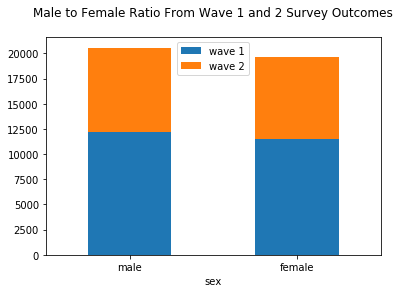

Ratio of male to female=  0.51:0.48 


In [148]:
# Number of female and males in the wave 1(Age 17 Baseline survey)
w1_gender = wave_1.groupby('sex').size()

# Number of female and males in the wave 2(Age 19 Followup survey)
w2_gender = wave_2.groupby('sex').size()

# Combine w1_gender and w2_gender
outcomes_gender = pd.concat([w1_gender, w2_gender], axis=1, keys=['wave 1','wave 2'])
print(outcomes_gender)

# Stacked bar plot showing the gender ratio from wave 1 and wave 2 survey outcomes
outcomes_gender.plot(kind='bar', stacked=True)
plt.legend(loc='upper center')
plt.xticks(rotation=0)
plt.title('Male to Female Ratio From Wave 1 and 2 Survey Outcomes\n')
plt.show()

print("Ratio of male to female=  0.51:0.48 ")

2) What is the education enrollment status of former youth?

#### Current Enrollment And Attendance (CurrEnroll)

“Yes” means the youth is enrolled in and attending high school, GED classes, or postsecondary vocational training or college, as of the date of the outcome data collection. A youth is still considered enrolled in and attending school if the youth would otherwise be enrolled in and attending a school that is currently out of session.

“Declined” means the youth did not answer this question.

In [149]:
# Former Youth at 19, OutcmFCS = Foster Care Status at Outcomes Collection
former_youth = wave_2.loc[wave_2['outcmfcs'] == 'no']
former_youth

,wave,stfcid,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,...,othrhlthin,medicalin,mentlhlthin,prescripin,baseline,fy14cohort,elig19,samplestate,insample,responded
23781,Age 19 Followup,AL000000046332,1,AL,000000046332,201603,1996-10-15,male,no,no,...,do not know,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23782,Age 19 Followup,AL000000193079,1,AL,000000193079,201603,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23787,Age 19 Followup,AL000000203921,1,AL,000000203921,201609,1997-05-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23788,Age 19 Followup,AL000000206382,1,AL,000000206382,201609,1997-07-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23796,Age 19 Followup,AL000000219475,1,AL,000000219475,201603,1997-03-15,male,no,no,...,do not know,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23797,Age 19 Followup,AL000000220526,1,AL,000000220526,201609,1997-04-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23800,Age 19 Followup,AL000000221359,1,AL,000000221359,201609,1997-09-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23803,Age 19 Followup,AL000000230092,1,AL,000000230092,201609,1997-09-15,male,no,no,...,do not know,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23804,Age 19 Followup,AL000000236271,1,AL,000000236271,201609,1997-09-15,female,no,no,...,blank,blank,blank,blank,yes,yes,yes,no,no,no
23806,Age 19 Followup,AL000000237467,1,AL,000000237467,201609,1997-07-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes


In [150]:
# Group former youth by current education enrollment (CurrEnroll) 
former_youth.groupby('currenroll').size()

currenroll
no          2886
yes         2313
declined     177
blank       6195
dtype: int64

- Former Foster Youth Enrolled and Attending School: 2,313
- Former Foster Youth Not Enrolled and Attending School: 2,886
- Unknown Education Status of Former Foster Youth (Either declined or left question blank): 6,372


#### 44% of former youth who answered this question said they are enrolled and attending school. More than half of former youth said they are not enrolled in school. 
#### ** This does not include the 6,372 that left this question blank.

2) Are there more positive educational enrollment outcomes for youth in foster care?

In [151]:
# Group current youth by current education enrollment (CurrEnroll) 
current_youth.groupby('currenroll').size()

currenroll
no          1152
yes         2345
declined      57
blank       1355
dtype: int64

#### Better educational enrollment outcomes from youth who are in foster care.

- Current Foster Youth Enrolled and Attending School: 2,345
- Current Foster Youth Not Enrolled and Attending School: 1,152
- Unknown Education Status of Current Foster Youth (Either declined or left question blank): 1,412

#### 67% of current youth who answered this question said they are enrolled and attending school. 33% are not enrolled in school
#### ** This does not include the 1,412 that left this question blank.

3) What is the highest level of education received by a majority of former foster youth?

#### Highest Educational Certification Received (HighEdCert):

A youth has received an education certificate if the youth has a high school diploma or general equivalency degree (GED), vocational certificate, vocational license, associate’s degree (e.g., A.A.), bachelor’s degree (e.g., B.A. or B.S.), or a higher degree as of the date of the outcome data collection. Indicate the highest degree that the youth has received.

In [152]:
# Group former foster youth by Highest Educational Certification Received (HighEdCert)
former_youth.groupby('highedcert').size().sort_values(ascending = False)

highedcert
blank                     6206
high school or ged        3013
none of the above         2072
declined                   155
vocational certificate      73
vocational license          36
associate degree             8
higher degree                6
bachelor degree              2
dtype: int64

In [153]:
# Group current foster youth by Highest Educational Certification Received (HighEdCert)
current_youth.groupby('highedcert').size().sort_values(ascending = False)

highedcert
high school or ged        2196
blank                     1357
none of the above         1212
declined                    62
vocational certificate      38
associate degree            21
vocational license           9
bachelor degree              8
higher degree                6
dtype: int64

- Highest level of education by most foster youth: High School or GED
- A high number of youth participants did not answer this question (blank or declined): 7,780
- 2.4% (207 out of 8,700) have a postsecondary vocational training or college education

4) Explore the relationship between educational outcomes and services (e.g., Post-secondary educational support)

In [154]:
# List column names from wave_2 and nytd_services dataframe
wave_2_cols = wave_2.columns.tolist()
# print(wave_2_cols)

nytd_serv_cols = nytd_services.columns.tolist()
# print(nytd_serv_cols)

# combine both list (col names from each dataframe) and drop duplicate column names
cols_to_use = list(wave_2_cols)
cols_to_use.extend(x for x in nytd_serv_cols if x not in cols_to_use)
print(cols_to_use)
# dfNew = merge(df, df2[cols_to_use], left_index=True, right_index=True, how='outer')

['wave', 'stfcid', 'stfips', 'st', 'recnumbr', 'repdate', 'dob', 'sex', 'amiakn', 'asian', 'blkafram', 'hawaiipi', 'white', 'raceunkn', 'racedcln', 'hisorgin', 'outcmrpt', 'outcmdte', 'outcmfcs', 'currfte', 'currpte', 'emplysklls', 'socsecrty', 'educaid', 'pubfinas', 'pubfoodas', 'pubhousas', 'othrfinas', 'highedcert', 'currenroll', 'cnctadult', 'homeless', 'subabuse', 'incarc', 'children', 'marriage', 'medicaid', 'othrhlthin', 'medicalin', 'mentlhlthin', 'prescripin', 'baseline', 'fy14cohort', 'elig19', 'samplestate', 'insample', 'responded', 'fy', 'fcstatsv', 'lclfipssv', 'tribesv', 'delinqntsv', 'edlevlsv', 'specedsv', 'ilnasv', 'acsuppsv', 'psedsuppsv', 'careersv', 'emplytrsv', 'budgetsv', 'housedsv', 'hlthedsv', 'famsuppsv', 'mentorsv', 'silsv', 'rmbrdfasv', 'educfinasv', 'othrfinasv', 'race', 'raceethn', 'agemp']


In [155]:
# Merge NYTD outcomes to NYTD Services Dataset
df = pd.merge(nytd_outcomes, nytd_services, on='stfcid', how='left')
df

,wave,stfcid,stfips_x,st_x,recnumbr_x,repdate_x,dob_x,sex_x,amiakn_x,asian_x,...,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,raceethn,agemp
0,Age 17 Baseline Survey,AL000000007183,1,AL,000000007183,201403,1996-10-15,female,no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",16
2,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",18
3,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",14
4,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",15
5,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",16
6,Age 17 Baseline Survey,AL000000059581,1,AL,000000059581,201403,1996-11-15,female,no,no,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",16
7,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,No,No,No,No,No,No,No,White Only,"NH, White Only",13
8,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,No,No,No,No,No,No,No,White Only,"NH, White Only",14
9,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,No,No,No,No,No,No,No,White Only,"NH, White Only",15


In [156]:
# Drop duplicate Child IDs
df = df.drop_duplicates(['stfcid'])
df

,wave,stfcid,stfips_x,st_x,recnumbr_x,repdate_x,dob_x,sex_x,amiakn_x,asian_x,...,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,raceethn,agemp
0,Age 17 Baseline Survey,AL000000007183,1,AL,000000007183,201403,1996-10-15,female,no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",16
3,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",14
6,Age 17 Baseline Survey,AL000000059581,1,AL,000000059581,201403,1996-11-15,female,no,no,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",16
7,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,No,No,No,No,No,No,No,White Only,"NH, White Only",13
11,Age 17 Baseline Survey,AL000000136739,1,AL,000000136739,201403,1997-02-15,female,no,no,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",17
12,Age 17 Baseline Survey,AL000000193079,1,AL,000000193079,201403,1996-10-15,male,no,no,...,No,No,No,No,No,No,Yes,Black Only,"NH, Black Only",18
13,Age 17 Baseline Survey,AL000000195457,1,AL,000000195457,201403,1996-10-15,male,no,no,...,No,No,No,No,No,No,No,Black Only,"NH, Black Only",15
16,Age 17 Baseline Survey,AL000000198581,1,AL,000000198581,201409,1997-04-15,female,no,no,...,Yes,No,Yes,No,No,No,No,Black Only,"NH, Black Only",15
19,Age 17 Baseline Survey,AL000000198583,1,AL,000000198583,201403,1996-12-15,male,no,no,...,Yes,Yes,Yes,No,No,Yes,Yes,Black Only,"NH, Black Only",18


In [157]:
# Drop duplicate columns (e.g: recnumbr_x and recnumber_y)

# define our drop function
def drop_y(df):
    # list comprehension of the cols that end with '_y'
    to_drop = [x for x in df if x.endswith('_y')]
    df.drop(to_drop, axis=1, inplace=True)

drop_y(df)
df

# func to rename '_x' cols
def rename_x(df):
    for col in df:
        if col.endswith('_x'):
            df.rename(columns={col:col.rstrip('_x')}, inplace=True)
rename_x(df)
df

/Users/angelakrontiris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/angelakrontiris/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,wave,stfcid,stfips,st,recnumbr,repdate,dob,se,amiakn,asian,...,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,raceethn,agemp
0,Age 17 Baseline Survey,AL000000007183,1,AL,000000007183,201403,1996-10-15,female,no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",16
3,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",14
6,Age 17 Baseline Survey,AL000000059581,1,AL,000000059581,201403,1996-11-15,female,no,no,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",16
7,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,No,No,No,No,No,No,No,White Only,"NH, White Only",13
11,Age 17 Baseline Survey,AL000000136739,1,AL,000000136739,201403,1997-02-15,female,no,no,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",17
12,Age 17 Baseline Survey,AL000000193079,1,AL,000000193079,201403,1996-10-15,male,no,no,...,No,No,No,No,No,No,Yes,Black Only,"NH, Black Only",18
13,Age 17 Baseline Survey,AL000000195457,1,AL,000000195457,201403,1996-10-15,male,no,no,...,No,No,No,No,No,No,No,Black Only,"NH, Black Only",15
16,Age 17 Baseline Survey,AL000000198581,1,AL,000000198581,201409,1997-04-15,female,no,no,...,Yes,No,Yes,No,No,No,No,Black Only,"NH, Black Only",15
19,Age 17 Baseline Survey,AL000000198583,1,AL,000000198583,201403,1996-12-15,male,no,no,...,Yes,Yes,Yes,No,No,Yes,Yes,Black Only,"NH, Black Only",18


The joined dataframe contains the services and survey outcomes.

In [158]:
# Eliminate rows containing null values (NaN)
df = df.dropna()
df

,wave,stfcid,stfips,st,recnumbr,repdate,dob,se,amiakn,asian,...,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,raceethn,agemp
1,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",16
3,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",14
6,Age 17 Baseline Survey,AL000000059581,1,AL,000000059581,201403,1996-11-15,female,no,no,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",16
7,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,No,No,No,No,No,No,No,White Only,"NH, White Only",13
11,Age 17 Baseline Survey,AL000000136739,1,AL,000000136739,201403,1997-02-15,female,no,no,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",17
12,Age 17 Baseline Survey,AL000000193079,1,AL,000000193079,201403,1996-10-15,male,no,no,...,No,No,No,No,No,No,Yes,Black Only,"NH, Black Only",18
13,Age 17 Baseline Survey,AL000000195457,1,AL,000000195457,201403,1996-10-15,male,no,no,...,No,No,No,No,No,No,No,Black Only,"NH, Black Only",15
16,Age 17 Baseline Survey,AL000000198581,1,AL,000000198581,201409,1997-04-15,female,no,no,...,Yes,No,Yes,No,No,No,No,Black Only,"NH, Black Only",15
19,Age 17 Baseline Survey,AL000000198583,1,AL,000000198583,201403,1996-12-15,male,no,no,...,Yes,Yes,Yes,No,No,Yes,Yes,Black Only,"NH, Black Only",18
22,Age 17 Baseline Survey,AL000000199584,1,AL,000000199584,201409,1997-04-15,male,no,no,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",14


In [159]:
#Set index to Recnumbr (Unique Child ID)
df.set_index('recnumbr')

,wave,stfcid,stfips,st,repdate,dob,se,amiakn,asian,blkafram,...,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,raceethn,agemp
recnumbr,,,,,,,,,,,,,,,,,,,,,
000000038434,Age 17 Baseline Survey,AL000000038434,1,AL,201409,1997-05-15,male,no,no,yes,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",16
000000046332,Age 17 Baseline Survey,AL000000046332,1,AL,201403,1996-10-15,male,no,no,yes,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",14
000000059581,Age 17 Baseline Survey,AL000000059581,1,AL,201403,1996-11-15,female,no,no,no,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",16
000000121244,Age 17 Baseline Survey,AL000000121244,1,AL,201409,1997-07-15,female,no,no,no,...,No,No,No,No,No,No,No,White Only,"NH, White Only",13
000000136739,Age 17 Baseline Survey,AL000000136739,1,AL,201403,1997-02-15,female,no,no,yes,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",17
000000193079,Age 17 Baseline Survey,AL000000193079,1,AL,201403,1996-10-15,male,no,no,yes,...,No,No,No,No,No,No,Yes,Black Only,"NH, Black Only",18
000000195457,Age 17 Baseline Survey,AL000000195457,1,AL,201403,1996-10-15,male,no,no,yes,...,No,No,No,No,No,No,No,Black Only,"NH, Black Only",15
000000198581,Age 17 Baseline Survey,AL000000198581,1,AL,201409,1997-04-15,female,no,no,yes,...,Yes,No,Yes,No,No,No,No,Black Only,"NH, Black Only",15
000000198583,Age 17 Baseline Survey,AL000000198583,1,AL,201403,1996-12-15,male,no,no,yes,...,Yes,Yes,Yes,No,No,Yes,Yes,Black Only,"NH, Black Only",18


In [160]:
# Replace all entries with 'declined','blank','Blank' to NaN
# Replace 'no','yes','unknown' with 'No', 'Yes','Unknown

df = df.replace('declined',np.nan).replace('no','No').replace('yes','Yes').replace('blank',np.nan).replace('Blank',np.nan).replace('unknown','Unknown')

df.reset_index()
df.dropna()

,wave,stfcid,stfips,st,recnumbr,repdate,dob,se,amiakn,asian,...,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,raceethn,agemp
1,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,No,No,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",16
3,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,No,No,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",14
12,Age 17 Baseline Survey,AL000000193079,1,AL,000000193079,201403,1996-10-15,male,No,No,...,No,No,No,No,No,No,Yes,Black Only,"NH, Black Only",18
13,Age 17 Baseline Survey,AL000000195457,1,AL,000000195457,201403,1996-10-15,male,No,No,...,No,No,No,No,No,No,No,Black Only,"NH, Black Only",15
16,Age 17 Baseline Survey,AL000000198581,1,AL,000000198581,201409,1997-04-15,female,No,No,...,Yes,No,Yes,No,No,No,No,Black Only,"NH, Black Only",15
22,Age 17 Baseline Survey,AL000000199584,1,AL,000000199584,201409,1997-04-15,male,No,No,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",14
26,Age 17 Baseline Survey,AL000000203185,1,AL,000000203185,201403,1997-03-15,male,No,No,...,No,No,Yes,No,No,No,No,White Only,"NH, White Only",14
31,Age 17 Baseline Survey,AL000000206479,1,AL,000000206479,201409,1997-09-15,male,No,No,...,No,No,Yes,No,No,No,No,Black Only,"NH, Black Only",17
32,Age 17 Baseline Survey,AL000000208296,1,AL,000000208296,201403,1997-01-15,male,No,No,...,No,No,No,No,No,No,No,Black Only,"NH, Black Only",13
36,Age 17 Baseline Survey,AL000000209854,1,AL,000000209854,201403,1997-01-15,male,No,No,...,Yes,No,No,No,No,Yes,No,Black Only,"NH, Black Only",17


5) Compare the race of foster youth:

race
White Only                7452
Black Only                4630
AmInd / AK Native Only     301
Asian Only                 154
>1 Race                    850
Race Missing              1565
dtype: int64


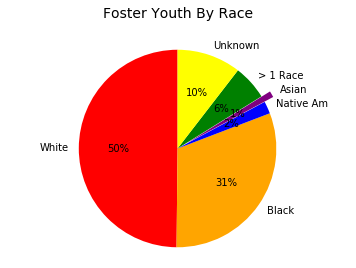

In [161]:
race_youth = df.groupby('race').size()
race_youth = race_youth.drop('Pac Islander Only')
print(race_youth)

# Plot foster youth by race
labels = ['White', 'Black','Native Am','Asian','> 1 Race','Unknown']
colors =['red','orange','blue', 'purple','green','yellow']

plt.pie(race_youth, labels=labels, colors=colors, startangle=90, autopct='%1.0f%%', explode = (0, 0, 0, 0.1, 0,0))
plt.axis('equal')
plt.title('Foster Youth By Race\n', fontsize=14)
plt.show()

6) Which services are utlilized the most?

- SpecEdSv: Special Education
- ILNAsv: Independent Living Needs Assessment
- AcSuppSv: Academic Support
- PSEdSuppSv: Post-Secondary Educational Support
- CareerSv: Career Preparation
- EmplyTrSv: Employment Programs Or Vocational
- BudgetSv: Budget And Financial Management
- HousEdSv: Housing Education And Home
- HlthEdSv: Health Education And Risk Prevention
- FamSuppSv: Family Support And Healthy Marriage
- MentorSv: Mentoring
- SILsv: Supervised Independent Living
- RmBrdFASv: Room And Board Financial Assistance
- EducFinASv: Education Financial Assistance
- OthrFinaSv: Other Financial Assistance

In [162]:
# Set up function to create education status column
def enrollment_status(row):
    if row == 'Yes':
        return 'Enrolled'
    elif row == 'No':
        return 'Not Enrolled'
    else: 
        return 'Neither'
    
# Apply function to 'currenroll column'
df['educstatus'] = df['currenroll'].apply(enrollment_status)

print(df['educstatus'])

1            Enrolled
3            Enrolled
6             Neither
7             Neither
11            Neither
12           Enrolled
13           Enrolled
16           Enrolled
19            Neither
22           Enrolled
26           Enrolled
31           Enrolled
32           Enrolled
36           Enrolled
37           Enrolled
40           Enrolled
42            Neither
43           Enrolled
46            Neither
47            Neither
50            Neither
51           Enrolled
56           Enrolled
57           Enrolled
60           Enrolled
62           Enrolled
67           Enrolled
69            Neither
71            Neither
73           Enrolled
             ...     
76618        Enrolled
76622        Enrolled
76625        Enrolled
76631        Enrolled
76636        Enrolled
76638    Not Enrolled
76642        Enrolled
76645        Enrolled
76646    Not Enrolled
76651        Enrolled
76655    Not Enrolled
76661        Enrolled
76665        Enrolled
76670        Enrolled
76675     

educstatus
Enrolled        10640
Neither          3687
Not Enrolled      662
dtype: int64


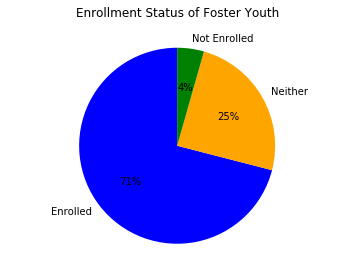

In [163]:
# Current Enrollment and Attendance
enrollment = df.groupby('educstatus').size()
print(enrollment)

labels = ['Enrolled', 'Neither','Not Enrolled']
colors =['blue','orange','green']

plt.pie(enrollment, labels=labels, colors=colors, startangle=90, autopct='%1.0f%%')
plt.axis('equal')
plt.title('Enrollment Status of Foster Youth\n', fontsize=12)
plt.show()

In [164]:
# List of NYTD services 
cols = ['specedsv', 'ilnasv', 'acsuppsv', 'psedsuppsv', 'careersv', 'emplytrsv', 'budgetsv', 'housedsv', 'hlthedsv', 'famsuppsv', 'mentorsv', 'silsv', 'rmbrdfasv', 'educfinasv', 'othrfinasv']

# Create list comprehension to count activity for each service and append to list of services
services = [ df.groupby(col).size() for col in cols ]

# Concatenate list of services into a dataframe
services_df = pd.concat(services, axis=1, keys=cols)

# Remove index name
services_df.index.name = None

print(services_df)

       specedsv  ilnasv  acsuppsv  psedsuppsv  careersv  emplytrsv  budgetsv  \
No        10888    7241      7856       12435     10682      12480     10749   
Yes        3401    7090      6475        1896      3649       1851      3582   
Blank         0       0         0           0         0          0         0   

       housedsv  hlthedsv  famsuppsv  mentorsv  silsv  rmbrdfasv  educfinasv  \
No        10477     10060      11145     12021  13464      13192       13044   
Yes        3854      4271       3186      2310    868       1139        1286   
Blank         0         0          0         0      0          0           0   

       othrfinasv  
No          11537  
Yes          2793  
Blank           0  


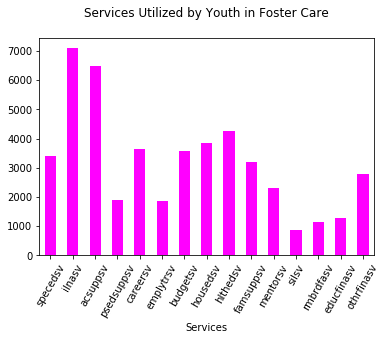

In [165]:
# Compare the services used by 14,989 foster youth
yes = services_df.iloc[1]

yes.plot(kind='bar', align='center', rot=60, color = 'magenta')
plt.xlabel('Services')
plt.title('Services Utilized by Youth in Foster Care\n')
plt.show()

##### Top 3 services used by foster youth:
------------------------------------------
- Independent Living Needs Assessment
- Academic Support
- Health Education And Risk Prevention

acsuppsv      6475
psedsuppsv    1896
educfinasv    1286
Name: Yes, dtype: int64


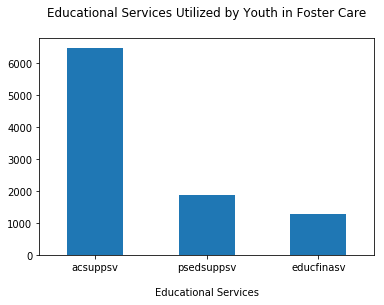

In [166]:
# Compare the educational services used by 14,989 foster youth
edu_servs = services_df.loc['Yes',['acsuppsv','psedsuppsv', 'educfinasv']]
print(edu_servs)

edu_servs.plot(kind='bar', rot=0)
plt.xlabel('\nEducational Services')
plt.title('Educational Services Utilized by Youth in Foster Care\n')
plt.show()

- 6,475 foster youth receive academic support such as counseling, studying for an exam, help with homework, etc...

- 64% of foster youth are receiving educational support (Academic, Post-secondary, and Financial)

*** Not including blank responses 

In [167]:
# Educational Outcomes from wave -1 (baseline) and wave-2 followup survey 
# Highest Educational Certification Received
print('\n',df.groupby('highedcert').size())

# Current Educational Level
print('\n',df.groupby('edlevlsv').size())


 highedcert
high school or ged          521
vocational certificate       31
vocational license            6
associate degree              7
bachelor degree               8
higher degree                14
none of the above         10373
declined                      0
blank                         0
dtype: int64

 edlevlsv
Less than 6th grade     329
6th grade               404
7th grade               971
8th grade              2432
9th grade              3671
10th grade             3464
11th grade             1769
12th grade              629
Post secondary           54
College                  69
Blank                     0
dtype: int64


# Statistical Analysis
-----------------------------

Use df2 with all 15 services and the education status from baseline (age 17) and follow-up (age 19) survey. 

Positive education = Enrolled

List of services:
- SpecEdSv: Special Education
- ILNAsv: Independent Living Needs Assessment
- AcSuppSv: Academic Support
- PSEdSuppSv: Post-Secondary Educational Support
- CareerSv: Career Preparation
- EmplyTrSv: Employment Programs Or Vocational
- BudgetSv: Budget And Financial Management
- HousEdSv: Housing Education And Home
- HlthEdSv: Health Education And Risk Prevention
- FamSuppSv: Family Support And Healthy Marriage
- MentorSv: Mentoring
- SILsv: Supervised Independent Living
- RmBrdFASv: Room And Board Financial Assistance
- EducFinASv: Education Financial Assistance
- OthrFinaSv: Other Financial Assistance

1) Using Chi-square Statistic to see if there is a correlation between the services provided by a Chafee funded country and a positive education outcome for a foster youth?

In [168]:
# Create new dataframe with enrollment status and NYTD Services using groupby and unstack

df2 = pd.concat([df.groupby(['educstatus',e])[e].count().unstack() for e in cols],axis=1).fillna(0).astype(int)    
df2.columns=pd.MultiIndex.from_product([cols,['Yes','No']])

df2


specedsv       ilnasv       acsuppsv       psedsuppsv        \
                  Yes    No    Yes    No      Yes    No        Yes    No   
educstatus                                                                 
Enrolled         7809  2464   5058  5245     5741  4562       8935  1368   
Neither          2578   793   1869  1510     1732  1647       2921   458   
Not Enrolled      501   144    314   335      383   266        579    70   

             careersv        ...  mentorsv       silsv      rmbrdfasv       \
                  Yes    No  ...       Yes    No   Yes   No       Yes   No   
educstatus                   ...                                             
Enrolled         7592  2711  ...      8565  1738  9707  597      9429  874   
Neither          2581   798  ...      2898   481  3143  236      3153  226   
Not Enrolled      509   140  ...       558    91   614   35       610   39   

             educfinasv      othrfinasv        
                    Yes   No        Yes    No  
educstatus                                     
Enrolled           9324  979       8178  2125  
Neither            3120  258       2870   508  
Not Enrolled        600   49        489   160  

[3 rows x 30 columns]

In [169]:
# Use chi-square test to determine the relationship of services and educational attainment of foster youth 
from scipy.stats import chisquare

chisquare(df2)

Power_divergenceResult(statistic=array([ 7814.488795  ,  2527.44545722,  4846.468996  ,  5562.61636107,
        5931.77774949,  4457.14316602,  8964.6880579 ,  1404.7721519 ,
        7449.18498409,  2933.01562072,  8909.65721154,  1462.56401945,
        7451.13647781,  2937.11725293,  7378.101174  ,  2995.71925272,
        7119.87574553,  3252.27862327,  8070.18734859,  2300.45762712,
        8460.40578987,  1924.13766234,  9816.14572193,   560.55990783,
        9371.57261977,  1011.49956102,  9272.32382705,  1110.74805599,
        8057.96532894,  2361.98281418]), pvalue=array([  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   9.06991150e-306,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000

#### All the services are statistically significant when compared to educational attainement.

Another interesting study to examine is the impact that post-secondary services have on foster youth attending college or post-secondary education. 

2) Is there a relationship between foster youth receiving post-secondary support (e.g. college prep) and college/post-secondary attainment?

Education Level: highest educational level completed by the youth. Post-secondary education or training refers to any other post-seondary education other than college. College refers to completing at least one semester of college.

Post-secondary education support: services designed to help a youth enter or complete a post-secondary education and include the following: Classes for test preparation, such as the Scholastic Aptitude Test (SAT);counseling about college; information about financial aid and scholarships; help completing college or loan applications; tutoring while in college.

In [170]:
# College or post-secondary education completed by the youth
educ_psedsupp = df.groupby(['edlevlsv','psedsuppsv']).size()

# Filter groupby with only 'College' and 'Post secondary' entries
college = educ_psedsupp[['College', 'Post secondary']]
print(college)

edlevlsv        psedsuppsv
Post secondary  No            40
                Yes           14
College         No            48
                Yes           21
dtype: int64


- Out of the 54 foster youth that completed a post-secondary education, 14 received post-secondary services.
- Out of the 69 foster youth that completed a college education, 21 received post-secondary services.

#### 28% of foster youth that completed a college or post-seondary education also received post-secondary services.

In [171]:
# Use chi-square test to determine the relationship of post-secondary services and college/post-secondary educational attainment of foster youth 

chisquare(college)

Power_divergenceResult(statistic=24.674796747967481, pvalue=1.8056780035994287e-05)

Based on the p-value (0.0000181) for the chi-square statistic, there is a postive correlation between receivng post-secondary services and attainig a college degree.  Since a post-secondary education is an important indicator of success, the state care should educate these children on the post-secondary services and should be accessible to them.  

For foster youth not enrolled in school or highest level of education is below high school, do certain types of behavior (e.g. substance abuse, incarceration, and parenthood correlate with them. 

3) Is there a relationship between foster youths substance abuse and low level of education attainment?

In [173]:
col_names = ['subabuse', 'incarc','children']

# Create list comprehension to count activity for 'subabuse','incarc', & 'children' 
neg_outcomes = [ df.groupby(col).size() for col in col_names ]

# Concatenate list of neg outcomes into a dataframe
neg_outcomes = pd.concat(neg_outcomes, axis=1, keys=col_names)

# Remove index name
neg_outcomes.index.name = None

print(neg_outcomes)

# Current Educational Level
print('\n',df.groupby('edlevlsv').size())


     subabuse  incarc  children
No       8166    7633     10632
Yes      3045    3577       546

 edlevlsv
Less than 6th grade     329
6th grade               404
7th grade               971
8th grade              2432
9th grade              3671
10th grade             3464
11th grade             1769
12th grade              629
Post secondary           54
College                  69
Blank                     0
dtype: int64


In [178]:
# Create new dataframe with education level (K-12) and outcomes (substance abuse, incarceration, and children)
df3 = pd.concat([df.groupby(['edlevlsv',e])[e].count().unstack() for e in col_names],axis=1).fillna(0).astype(int)    
df3.columns=pd.MultiIndex.from_product([col_names,['Yes','No']])

df3 = df3.drop(df3.index[[1,2,4,5,7,8,9]])
df3

subabuse      incarc      children    
                         Yes   No    Yes   No      Yes  No
edlevlsv                                                  
Less than 6th grade      170   42    154   56      194  11
8th grade               1366  489   1261  594     1750  96
11th grade               936  360    874  423     1233  65

In [179]:
chisquare(df3)

Power_divergenceResult(statistic=array([  890.80582524,   356.42424242,   827.26867628,   422.52935694,
        1186.0075543 ,    64.54651163]), pvalue=array([  3.66414646e-194,   4.01290750e-078,   2.29556408e-180,
         1.77384602e-092,   2.89555512e-258,   9.63613969e-015]))

There is a negative correlation between the three negative outcomes (substance abuse, incarceration, and children) and three grade levels (less than 6th grade, 8th grade, and 11th grade)

## Is there a correlation between Incarceration and Age?

In [180]:
# Create a DataFrame with number of incarcerations for each age

#print(stress_df_vol)
incarc = df[df['incarc'] == 'Yes']
# print(incarc)

incarc_by_age = incarc.groupby('agemp').size().sort_values(ascending = False)
# print(incarc_by_age)

# Convert series to DataFrame
incarc_by_age_df = pd.DataFrame(data=incarc_by_age, columns=['incarc'])
# print(incarc_by_age_df)

# Reset index of incarc_by_age_df
incarc_by_age_df = incarc_by_age_df.reset_index()

# Drop index 7 and on
incarc_by_age_df = incarc_by_age_df.drop(incarc_by_age_df.index[7:24])

incarc_by_age_df['agemp'] = incarc_by_age_df['agemp'].astype('int')
print(incarc_by_age_df)

   agemp  incarc
0     16    1397
1     17     785
2     15     727
3     14     346
4     18     194
5     13      96
6     19      32


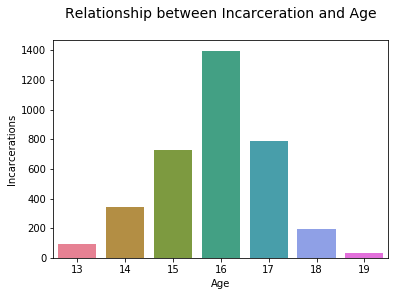

In [181]:
# Create scatter plot to show relationship between 'Incarceration' and 'Age'

sns.barplot(x='agemp',y='incarc', data=incarc_by_age_df, palette="husl")
plt.title('Relationship between Incarceration and Age\n', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Incarcerations')
plt.show()

#### Foster children at age 16 are more likely to be incarcerated.

# Machine Learning
-----------------

### I. Random Forest Classifier

1) Use random forest regression to determine which services and outcomes are good predictors of educational attainment.

In [182]:
# Create DataFrame to use for model

# Make a copy of the combined data of NYTD outcomes and services
df4 = df.copy()

# Rename 'se' column with 'sex'
df4 = df4.rename(columns={'se': 'sex'})

# Column labels from df4
cols = df4.columns.values

# Create new column 'Enrolled' . This will be used for target variable
# Set up function to create 'Enrolled' column
def enrollment_status(row):
    if row == 'Yes':
        return 1
    elif row == 'No':
        return 0
    else: 
        return np.nan
    
# Apply function to 'currenroll' column
df4['enrolled'] = df4['currenroll'].apply(enrollment_status)

# Replace 'Yes, received services & was in FC' with 'Yes'  and 'No, received services, but was not in FC' with 'No' in fcstatsv column
df4['fcstatsv'] = df4['fcstatsv'].replace('Yes, received services & was in FC','Yes')
df4['fcstatsv'] = df4['fcstatsv'].replace('No, received services, but was not in FC','No')

# Loop through dataframe and replace rows with 'blank' and 'Blank' with NaNs
df4 = df4.replace('blank', np.nan).replace('Blank',np.nan).replace('unknown','Unknown')

# Drop NaN's from df4
df4 = df4.dropna()


In [183]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8474 entries, 1 to 76733
Data columns (total 73 columns):
wave           8474 non-null category
stfcid         8474 non-null object
stfips         8474 non-null int8
st             8474 non-null object
recnumbr       8474 non-null object
repdate        8474 non-null object
dob            8474 non-null object
sex            8474 non-null category
amiakn         8474 non-null object
asian          8474 non-null object
blkafram       8474 non-null object
hawaiipi       8474 non-null object
white          8474 non-null object
raceunkn       8474 non-null object
racedcln       8474 non-null object
hisorgin       8474 non-null object
outcmrpt       8474 non-null category
outcmdte       8474 non-null object
outcmfcs       8474 non-null object
currfte        8474 non-null object
currpte        8474 non-null object
emplysklls     8474 non-null object
socsecrty      8474 non-null object
educaid        8474 non-null object
pubfinas       8474 non-

In [184]:
# Drop certain columns
cols_to_drop = ['wave','stfcid','st','recnumbr','repdate','dob','outcmdte','racedcln','lclfipssv','raceethn','raceunkn','prescripin','fy14cohort','fy','elig19','agemp','responded','samplestate','insample','currenroll', 'educstatus','highedcert','edlevlsv']

# Drop columns from list cols_to_drop
df4.drop(cols_to_drop, axis=1, inplace=True)

# Reset index
df4 = df4.reset_index(drop=True)


2) Creating Dummy Variables for Feature Selection

In [185]:
# Dummify all columns in DataFrame, df4
dummy_df = pd.get_dummies(df4)
print(dummy_df.head())

   stfips  enrolled  sex_male  sex_female  amiakn_No  amiakn_Unknown  \
0       1       1.0         1           0          1               0   
1       1       1.0         1           0          1               0   
2       1       1.0         1           0          1               0   
3       1       1.0         1           0          1               0   
4       1       1.0         0           1          1               0   

   amiakn_Yes  asian_No  asian_Unknown  asian_Yes        ...          \
0           0         1              0          0        ...           
1           0         1              0          0        ...           
2           0         1              0          0        ...           
3           0         1              0          0        ...           
4           0         1              0          0        ...           

   othrfinasv_No  othrfinasv_Yes  othrfinasv_Blank  race_White Only  \
0              1               0                 0             

In [186]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8474 entries, 0 to 8473
Columns: 143 entries, stfips to race_Race Missing
dtypes: float64(1), int8(1), uint8(141)
memory usage: 1.2 MB


2) Select best features using Random Forest Classifier

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Y = Target variable, X = Features
Y = dummy_df['enrolled']
X = dummy_df.drop(['enrolled'],axis=1)

# Extract columns from dummy_df
feat_labels = X.columns.values

# Splitting the data from df4 into test and training sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state=21)

forest = RandomForestClassifier(random_state=21)

# Training random forest model
forest.fit(X_train, Y_train)

# Feature importance
importance = forest.feature_importances_

# Returns indices of sorted importance (greatest to least)
indices = np.argsort(importance)[::-1]

# Replace indices with feat_labels
best_feats = []
for f in range(10):
    print("%2d) %-*s %f" % (f + 1, 20, feat_labels[indices[f]], importance[indices[f]]))
    best_feats.append(feat_labels[indices[f]])
    

 1) stfips               0.093569
 2) subabuse_No          0.022769
 3) sex_female           0.022303
 4) acsuppsv_No          0.020929
 5) subabuse_Yes         0.019500
 6) homeless_No          0.019326
 7) incarc_No            0.018779
 8) acsuppsv_Yes         0.018760
 9) sex_male             0.018472
10) incarc_Yes           0.018004
11) specedsv_No          0.017306
12) homeless_Yes         0.016882
13) delinqntsv_Yes       0.015500
14) specedsv_Yes         0.015468
15) hlthedsv_Yes         0.015045


In [191]:
# Top 10 features 
print("Best features:\n\n", best_feats)

Best features:

 ['stfips', 'subabuse_No', 'sex_female', 'acsuppsv_No', 'subabuse_Yes', 'homeless_No', 'incarc_No', 'acsuppsv_Yes', 'sex_male', 'incarc_Yes', 'specedsv_No', 'homeless_Yes', 'delinqntsv_Yes', 'specedsv_Yes', 'hlthedsv_Yes']


# Error: Maximum Likelihood optimization failed to converge

In [192]:
# logit model
import statsmodels.api as sm
from pandas.core import datetools

# Creating a summary table
logit_model = sm.Logit(Y, X[best_feats])
result = logit_model.fit()
result.summary()

         Current function value: 0.222635
         Iterations: 35


/Users/angelakrontiris/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/angelakrontiris/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
/Users/angelakrontiris/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/angelakrontiris/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/angelakrontiris/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               enrolled   No. Observations:                 8474
Model:                          Logit   Df Residuals:                     8464
Method:                           MLE   Df Model:                            9
Date:                Mon, 19 Feb 2018   Pseudo R-squ.:                0.004155
Time:                        12:09:58   Log-Likelihood:                -1886.6
converged:                      False   LL-Null:                       -1894.5
                                        LLR p-value:                   0.07247
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
stfips            -0.0035      0.003     -1.324      0.186      -0.009       0.002
subabuse_No        0.4458        nan        nan        nan         nan         nan
sex_female         0.5536        nan        nan        nan         nan         nan
acsuppsv_No        0.4621        nan        nan        nan         nan         nan
subabuse_Yes       0.5030        nan        nan        nan         nan         nan
homeless_No        0.5238   4.04e+06    1.3e-07      1.000   -7.91e+06    7.91e+06
incarc_No          0.5471        nan        nan        nan         nan         nan
acsuppsv_Yes       0.4867        nan        nan        nan         nan         nan
sex_male           0.3952        nan        nan        nan         nan         nan
incarc_Yes         0.4018        nan        nan        nan         nan         nan
specedsv_No        0.4192   9.65e+05   4.35e-07      1.000   -1.89e+06    1.89e+06
homeless_Yes       0.4250   4.04e+06   1.05e-07      1.000   -7.91e+06    7.91e+06
delinqntsv_Yes    -0.1770      0.132     -1.341      0.180      -0.436       0.082
specedsv_Yes       0.5296   9.65e+05   5.49e-07      1.000   -1.89e+06    1.89e+06
hlthedsv_Yes       0.1393      0.109      1.275      0.202      -0.075       0.353
==================================================================================
"""

#### The logit model shows that only 10% of the features selected using random forest feature importnace are significant. 

In [ ]:
# Testing accuracy on the random forest classifier
print("Accuracy of Random Forest classifier on test set: {: .2f}" .format(forest.score(X_test, Y_test)))
print("Accuracy of Random Forest classifier on training set: {: .2f}" .format(forest.score(X_train, Y_train)))

3) Evaluate performance of random forest classification

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

Y_train_pred = forest.predict(X_train)
Y_test_pred = forest.predict(X_test)

print("MSE train: %.3f, test: %.3f" % (mean_squared_error(Y_train, Y_train_pred),mean_squared_error(Y_test, Y_test_pred)))

In [ ]:
print('R^2 train: %.3f, test: %.3f' % (r2_score(Y_train, Y_train_pred), r2_score(Y_test, Y_test_pred)))

### II. Logistic Regression Classification

Classification tries to predict, which of a small set of classes, an observation belongs to. Mathematically, the aim is to find y (enrollment), a label based on knowing a feature vector x (e.g. substance abuse)

1) Feature Selection using Recursive Feature Elimination (RFE)

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression()
rfe = RFE(logreg, 10)
rfe = rfe.fit(X, Y)
print(rfe.support_)
print(rfe.ranking_)

# # Get column names (features) 
col_names = X.columns.values

# Print best feature names
best_features_raw = rfe.support_ * col_names

# Create list with best feature names
best_feats_2 = []

for best_feature in best_features_raw:
    if len(best_feature) > 0:
        best_feats_2.append(best_feature)
        
print('Best Features: {}'.format(best_feats_2))

2) Training logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=21)

# Fit model on training data
logreg.fit(X_train, Y_train)

Y_train_pred_lr = logreg.predict(X_train)
Y_test_pred_lr = logreg.predict(X_test)

### Performance Evaluation Metrics

In [ ]:
# 1) Testing accuracy on logistic regression
print("Accuracy of Logistic Regression on test set: {: .2f}" .format(logreg.score(X_test, Y_test)))
print("Accuracy of Logistic Regression on training set: {: .2f}" .format(logreg.score(X_train, Y_train)))

In [ ]:
# 2) Confusion Matrix
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true= Y_test, y_pred= Y_test_pred_lr)
print(confmat)

# Graph the confusion matrix
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

3) Logit model to test which features are significant

In [ ]:
import statsmodels.api as sm
from pandas.core import datetools

# Creating a summary table
logit_model = sm.Logit(Y, X[best_feats_2])
result = logit_model.fit(method='bfgs')
result.summary()

#### The logit model shows that 40% of the features selected using RFE are significant. 